In [ ]:
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

import os, sys, time
from tqdm import tqdm
from IPython.display import clear_output

In [ ]:
batch_size = 256
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
      transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, )),
])

train_datasets = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_datasets, shuffle=True, batch_size=batch_size)

In [ ]:
train_loader

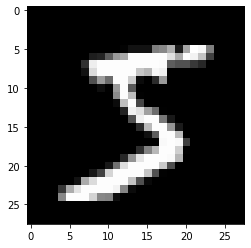

In [ ]:
plt.imshow(train_datasets[0][0][0], cmap="gray")

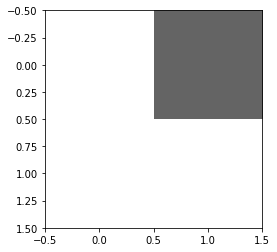

In [ ]:
plt.imshow(np.array([[255,100],[255,255]]), cmap="gray", vmin=0, vmax=255)

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.main = nn.Sequential(
        nn.ConvTranspose2d(100+10, 1024, 4, 1, 0), # 4 * 4
        nn.BatchNorm2d(1024),
        nn.ReLU(),

        nn.ConvTranspose2d(1024, 512, 4, 1, 0), # 7 * 7
        nn.BatchNorm2d(512),
        nn.ReLU(),

        nn.ConvTranspose2d(512, 256, 2, 2, 0), # 14 * 14
        nn.BatchNorm2d(256),
        nn.ReLU(),

        nn.ConvTranspose2d(256, 1, 2, 2, 0), # 28 * 28
        nn.Tanh(),
    )

  def forward(self, input):
    return self.main(input)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Conv2d( 1 + 10, 32, 5, 2),
        nn.LeakyReLU(0.2),

        nn.Conv2d(32, 64, 3, 2),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),
    )

    size_check = torch.FloatTensor(10, 11, 28, 28)
    size = self.check_cnn_size(size_check).size()

    self.flat = nn.Flatten()

    self.dense = nn.Sequential(
        nn.Linear(size[1]*size[2]*size[3] , 1),
        nn.Sigmoid(),
    )

  def forward(self, input):
    out = self.conv(input)
    out = self.flat(out)
    return self.dense(out)

  def check_cnn_size(self, input):
    return self.conv(input)

In [ ]:
G = Generator().to(device)
D = Discriminator().to(device)

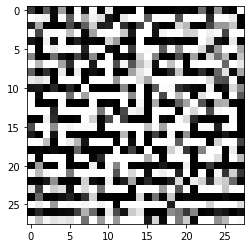

In [ ]:
z = torch.randn(10,100,1,1).to(device)
y = torch.randint(0,2,(10,10,1,1)).to(device)
z = torch.cat( (z,y), 1 )
plt.imshow(G(z)[0].permute(1,2,0)[:,:,0].cpu().detach(), cmap="gray")

In [ ]:
fake = G(z)
fake.size()
x = torch.rand(10,10,28,28).to(device)
fake = torch.cat((fake, x), 1)
D(fake)

tensor([[0.4250],
        [0.3558],
        [0.3967],
        [0.5470],
        [0.2594],
        [0.6084],
        [0.4587],
        [0.5127],
        [0.4850],
        [0.4676]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [ ]:
def p(*args):
  for a in args:
    print(a)
  sys.exit()

In [ ]:
def imshow_from_tensor(tensor, vmin=0 , vmax=1):
  plt.imshow(tensor[0].cpu().detach(), cmap="gray", vmin=vmin, vmax=vmax)
  plt.show()

epoch : 1 iter : 235 : time : 77.82744359970093 loss_G : 0.8861718773841858 loss_D : 1.2346749305725098


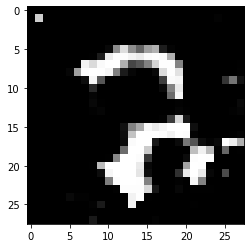

epoch : 2 iter : 470 : time : 79.48064827919006 loss_G : 0.8797051906585693 loss_D : 1.2116999626159668


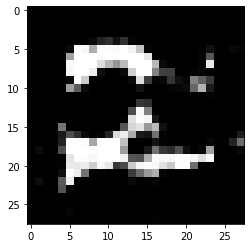

epoch : 3 iter : 705 : time : 79.40533137321472 loss_G : 0.9170247912406921 loss_D : 1.2153316736221313


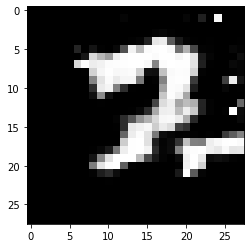

epoch : 4 iter : 940 : time : 79.62736463546753 loss_G : 0.9150990843772888 loss_D : 1.1436878442764282


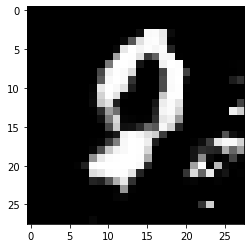

epoch : 5 iter : 1175 : time : 79.37214469909668 loss_G : 0.8810221552848816 loss_D : 1.164148211479187


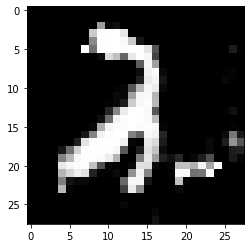

epoch : 6 iter : 1410 : time : 79.70170092582703 loss_G : 0.8880219459533691 loss_D : 1.2199758291244507


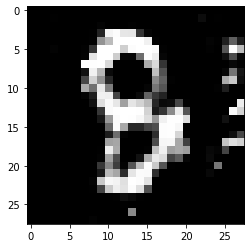

epoch : 7 iter : 1645 : time : 79.68516111373901 loss_G : 0.8907142281532288 loss_D : 1.156604528427124


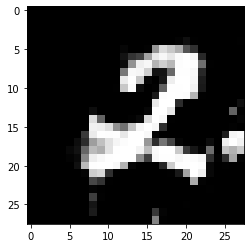

epoch : 8 iter : 1880 : time : 79.77694797515869 loss_G : 0.8975638151168823 loss_D : 1.1890922784805298


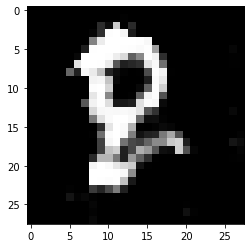

epoch : 9 iter : 2115 : time : 79.711993932724 loss_G : 0.8926048874855042 loss_D : 1.1615897417068481


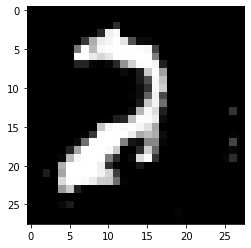

epoch : 10 iter : 2350 : time : 79.86971926689148 loss_G : 0.9151535630226135 loss_D : 1.1375385522842407


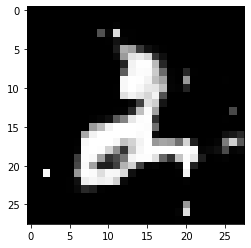

epoch : 11 iter : 2585 : time : 79.95714545249939 loss_G : 0.9130743741989136 loss_D : 1.151917815208435


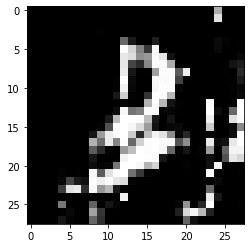

epoch : 12 iter : 2820 : time : 79.92224907875061 loss_G : 0.9073562622070312 loss_D : 1.1526434421539307


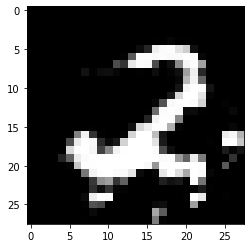

epoch : 13 iter : 3055 : time : 80.1351568698883 loss_G : 0.8835113644599915 loss_D : 1.1581324338912964


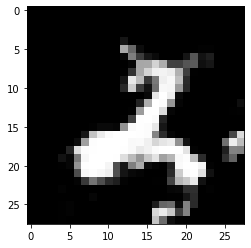

epoch : 14 iter : 3290 : time : 80.13026833534241 loss_G : 0.8606870770454407 loss_D : 1.1470524072647095


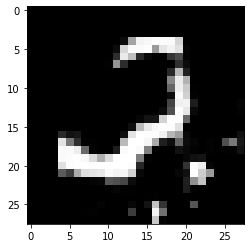

epoch : 15 iter : 3525 : time : 80.13519430160522 loss_G : 0.8697406649589539 loss_D : 1.1293116807937622


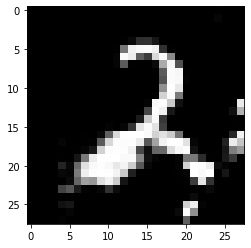

epoch : 16 iter : 3760 : time : 80.02516722679138 loss_G : 0.8720706701278687 loss_D : 1.1705676317214966


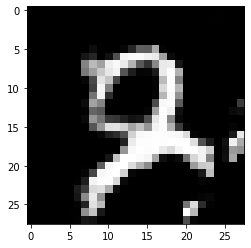

epoch : 17 iter : 3995 : time : 80.30586981773376 loss_G : 0.8746864795684814 loss_D : 1.144242525100708


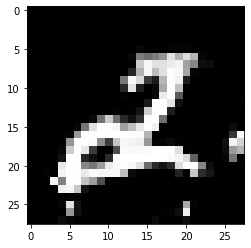

epoch : 18 iter : 4230 : time : 80.38363099098206 loss_G : 0.8580077290534973 loss_D : 1.1462475061416626


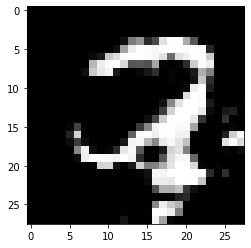

epoch : 19 iter : 4465 : time : 80.47522759437561 loss_G : 0.8950613737106323 loss_D : 1.1551514863967896


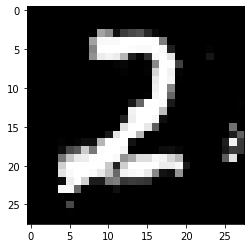

epoch : 20 iter : 4700 : time : 80.60934686660767 loss_G : 0.8845363259315491 loss_D : 1.1139438152313232


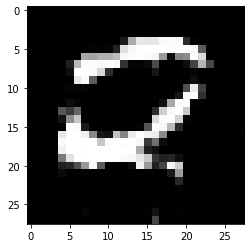

epoch : 21 iter : 4935 : time : 80.43925380706787 loss_G : 0.9103187918663025 loss_D : 1.1146206855773926


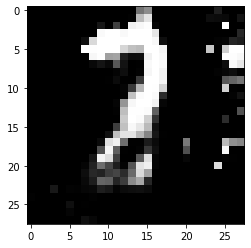

epoch : 22 iter : 5170 : time : 80.62231087684631 loss_G : 0.8965016007423401 loss_D : 1.1351845264434814


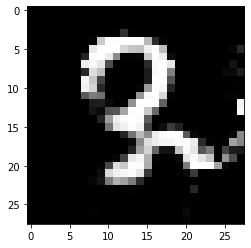

epoch : 23 iter : 5405 : time : 80.54463171958923 loss_G : 0.8905996680259705 loss_D : 1.1285481452941895


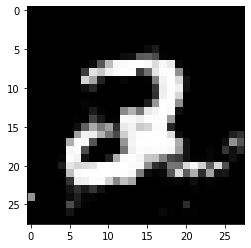

epoch : 24 iter : 5640 : time : 80.34660291671753 loss_G : 0.9060899019241333 loss_D : 1.1212538480758667


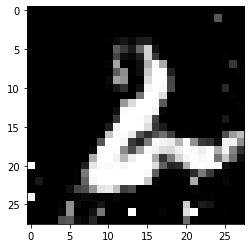

epoch : 25 iter : 5875 : time : 80.51196837425232 loss_G : 0.9078909754753113 loss_D : 1.1295418739318848


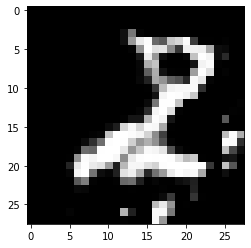

epoch : 26 iter : 6110 : time : 80.64954733848572 loss_G : 0.8960891962051392 loss_D : 1.0997774600982666


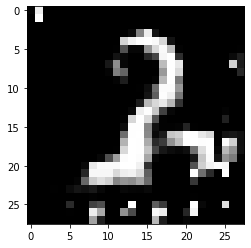

epoch : 27 iter : 6345 : time : 80.5947778224945 loss_G : 0.8951539993286133 loss_D : 1.1015169620513916


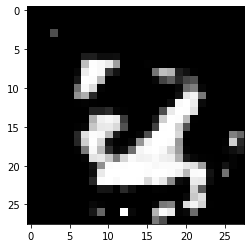

epoch : 28 iter : 6580 : time : 80.62251377105713 loss_G : 0.8909964561462402 loss_D : 1.115856409072876


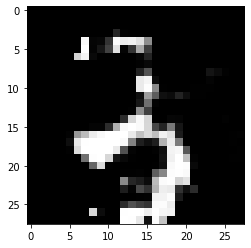

epoch : 29 iter : 6815 : time : 80.55146908760071 loss_G : 0.8926763534545898 loss_D : 1.108633041381836


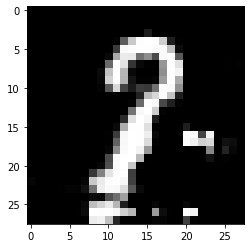

epoch : 30 iter : 7050 : time : 80.6354660987854 loss_G : 0.8917682766914368 loss_D : 1.118886113166809


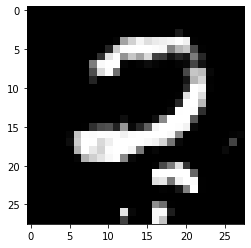

In [ ]:
epochs = 30
iter = 0

criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)

one_labels =  torch.ones(batch_size*2, 1).to(device)
zero_labels = torch.zeros(batch_size*2, 1).to(device)

for epoch in range(epochs):
  start = time.time()
  running_loss_G = 0
  running_loss_D = 0
  count = 0

  for (data, labels) in train_loader:



    iter += 1
    count += 1

    size = data.size(0)
    y = []
    class_num = list(range(10))
    G_size = size * 2
    for i in range(G_size):
      y.append(class_num[i%10])
    

    ## train G ##

    opt_G.zero_grad()
    opt_D.zero_grad()

    # 潜在変数 100 + 10 dim
    z = torch.randn(G_size,100,1,1).to(device)
    y_one_hot = torch.nn.functional.one_hot(torch.Tensor(y[:G_size]).long(), num_classes=10).view(G_size,10,1,1).to(device)
    z = torch.cat( (z,y_one_hot), 1)
    
    fake_imgs = G(z) # fake img
    fake_labels_imgs = torch.zeros(G_size, 10, 28, 28).to(device) # 偽画像のラベル画像を作成 10次元
    for i in range(G_size):
      fake_labels_imgs[i][y[i]] += 1 # ターゲットは全て１
    
    fake_imgs = torch.cat( (fake_imgs, fake_labels_imgs), 1)
    
    out_G = D(fake_imgs) # 判別
    loss_G = criterion(out_G, one_labels[:G_size]) # 本物と見られるようにする。　教師ラベルは１

    loss_G.backward()
    opt_G.step()
    running_loss_G += loss_G

    ## train D ##

    opt_G.zero_grad()
    opt_D.zero_grad()

    z = torch.randn(size,100,1,1).to(device)
    y = y[:size]
    y_one_hot = torch.nn.functional.one_hot(torch.Tensor(y).long(), num_classes=10).view(size,10,1,1).to(device)
    z = torch.cat( (z,y_one_hot), 1)
    fake_imgs = G(z)
    fake_labels_imgs = torch.zeros(size, 10, 28, 28).to(device)
    for i in range(size):
      fake_labels_imgs[i][y[i]] += 1
    fake_imgs = torch.cat( (fake_imgs, fake_labels_imgs), 1)
    out_fake_G = D(fake_imgs)
    loss_fake_D = criterion(out_fake_G, zero_labels[:size]) # 偽物を見破るので全て0
    
    real_imgs = data.to(device)

    real_labels_imgs = torch.zeros(size, 10, 28, 28).to(device)
    for i in range(size):
      real_labels_imgs[i][labels[i]] += 1
    real_imgs = torch.cat( (real_imgs, real_labels_imgs), 1)

    out_real_G = D(real_imgs)
    loss_real_D = criterion(out_real_G, one_labels[:size]) # 本物を判別するので全て1
    
    loss_D = loss_fake_D + loss_real_D
    running_loss_D += loss_D

    loss_D.backward()
    
    opt_D.step()
  
  print(f"epoch : {epoch + 1} iter : {iter} : time : {time.time() - start} loss_G : {running_loss_G / count} loss_D : {running_loss_D / count}")

  z = torch.randn(1,100,1,1).to(device)
  y = [2]
  y_one_hot = torch.nn.functional.one_hot(torch.Tensor(y).long(), num_classes=10).view(1,10,1,1).to(device)
  z = torch.cat( (z, y_one_hot), 1)
  fake_img = G(z)
  imshow_from_tensor(fake_img[0],-1,1)



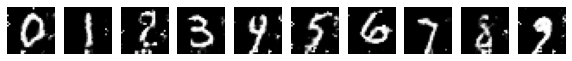

In [ ]:
z = torch.randn(10,100,1,1).to(device)
y = list(range(10))
y_one_hot = torch.nn.functional.one_hot(torch.Tensor(y).long(), num_classes=10).view(10,10,1,1).to(device)
z = torch.cat( (z, y_one_hot), 1)
    
fake_img = G(z)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  img = fake_img[i].permute(1,2,0)
  plt.imshow(img.cpu().detach()[:,:,0], cmap="gray", vmin=-1, vmax=1)
  plt.axis('off')

plt.show()

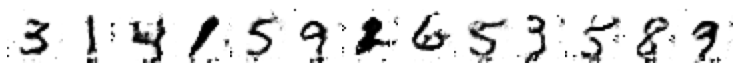

In [ ]:
y = [3,1,4,1,5,9,2,6,5,3,5,8,9]
size = len(y)

z = torch.randn(size,100,1,1).to(device)

y_one_hot = torch.nn.functional.one_hot(torch.Tensor(y).long(), num_classes=10).view(size,10,1,1).to(device)
z = torch.cat( (z, y_one_hot), 1)
    
fake_img = G(z)
plt.figure(figsize=(size,size))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(size):
  plt.subplot(1,size,i+1)
  img = fake_img[i].permute(1,2,0)
  plt.imshow((-1)*img.cpu().detach()[:,:,0], cmap="gray", vmin=-1, vmax=1)
  plt.axis('off')

plt.show()